In [1]:
import piscola
version = piscola.__version__
print(f'PISCOLA version: v{version}')

PISCOLA version: v1.0.4


In [8]:
sn = piscola.call_sn('03D1au.dat')

c:\ProgramData\Anaconda3\envs\tfgpiscola\lib\site-packages\piscola\filters_class.py:181: RuntimeWarning: divide by zero encountered in divide
  sed_flux = 3631e-23 * c / sed_wave**2  # in [erg s^-1 cm^-2 Å^-1]
c:\ProgramData\Anaconda3\envs\tfgpiscola\lib\site-packages\piscola\filters_class.py:145: RuntimeWarning: invalid value encountered in multiply
  I1 = np.trapz(sed_flux * transmission * sed_wave, sed_wave)


In [9]:
print(sn)
print(f'Observed bands: {sn.bands}')

name: 03D1au, z: 0.50349, ra: 36.043, dec: -4.0375

Observed bands: ['Megacam_g', 'Megacam_r', 'Megacam_i', 'Megacam_z']


In [12]:
print(sn.lcs)
print(sn.lcs.Megacam_g)
sn.lcs.Megacam_g.__dict__

['Megacam_g', 'Megacam_r', 'Megacam_i', 'Megacam_z']
band: Megacam_g, zp: nan, mag_sys: AB


{'band': 'Megacam_g',
 'time': array([52880.58, 52900.49, 52904.6 , 52908.53, 52930.39, 52934.53,
        52937.55, 52944.39, 52961.45, 52964.37, 52992.33, 52999.32]),
 'flux': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
 'flux_err': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
 'zp': nan,
 'mag': array([        nan, 23.57785366, 23.4612822 , 23.48125521, 24.97775471,
        25.32560101, 25.43611017, 26.24495696, 26.15168234, 26.89551142,
        26.78329758, 30.62952993]),
 'mag_err': array([        nan,  0.06302403,  0.03271209,  0.03138942,  0.11147757,
         0.13877611,  0.26072595,  0.62369171,  0.53941833,  0.70681738,
         0.75861258, 23.28516396]),
 'mag_sys': 'AB'}

c:\ProgramData\Anaconda3\envs\tfgpiscola\lib\site-packages\matplotlib\axes\_base.py:2539: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


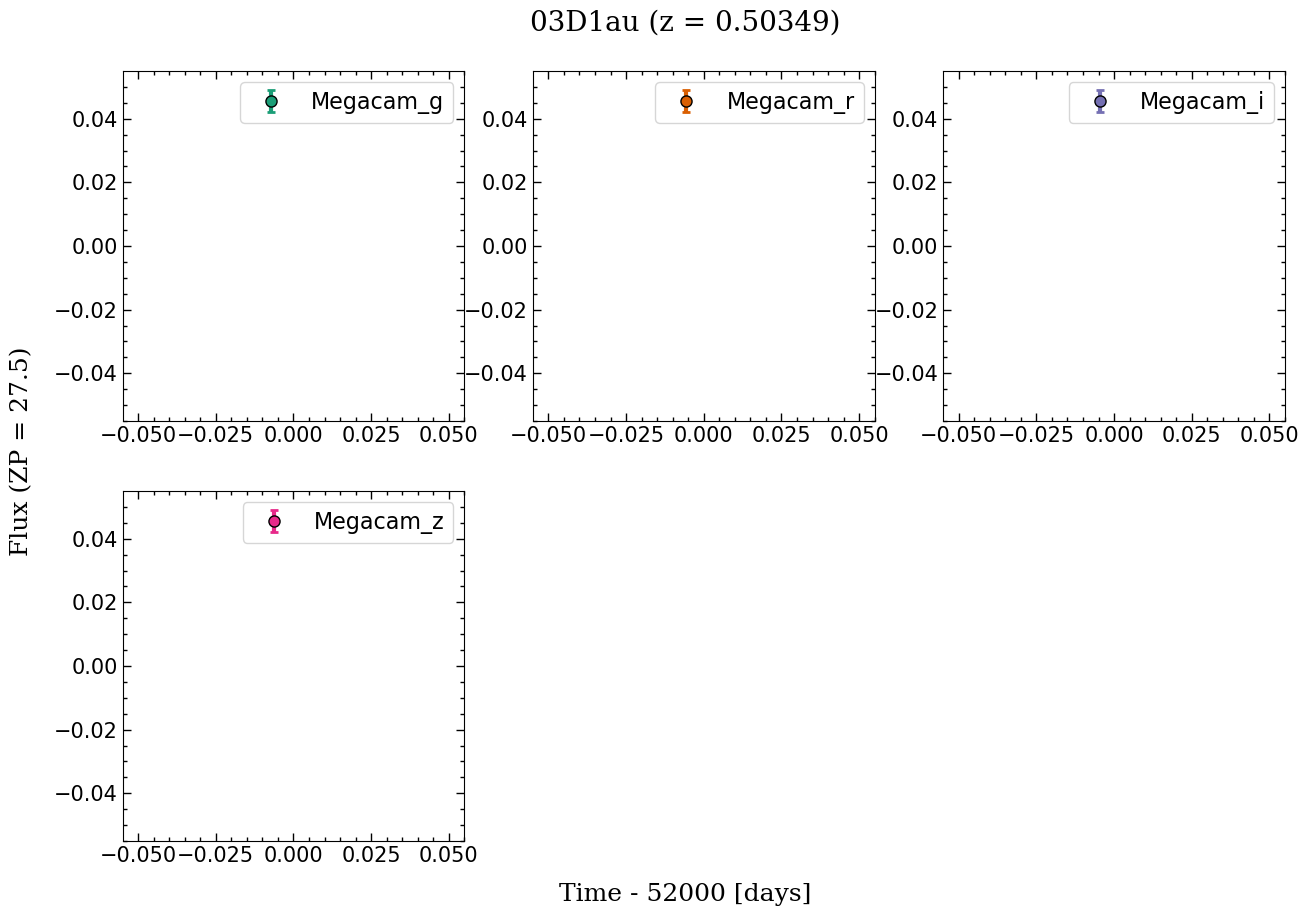

In [10]:
sn.plot_lcs()

In [11]:
sn.fit()

ValueError: array must not contain infs or NaNs

In [13]:
import hostphot

print('Hostphot version:', hostphot.__version__)
print('Working directory:', hostphot.workdir)

Hostphot version: 2.2.0
Working directory: images


In [14]:
print('Working directory:', hostphot.workdir)

Working directory: images


In [15]:
from hostphot.cutouts import download_images

name = 'SN2004eo'
host_ra, host_dec = 308.2092, 9.92755  # coords of host galaxy of SN2004eo
survey = 'PS1'
download_images(name, host_ra, host_dec, survey=survey)

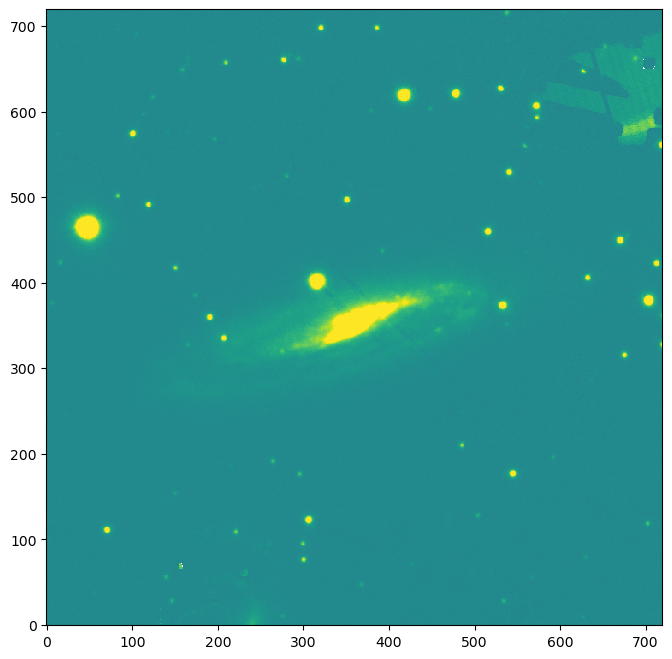

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

img = fits.open('images/SN2004eo/PS1_g.fits')

data = img[0].data
m, s = np.nanmean(data), np.nanstd(data)

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(data, interpolation='nearest',
               cmap='gray',
               vmin=m-s, vmax=m+s,
               origin='lower')
plt.show()